# Employee Retention

This project is taken from the book "A Collection of Data Science Take-home Challenges". 

The goal is to predict employee retention and understand its main drives.

Questions to answer:
    1. What are the main factors that drive employee churn?
    2. What additional variable could help explain employee churn?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import seaborn as sns
sns.set_style('white')
np.set_printoptions(precision=2)
rcParams['figure.figsize'] = (16, 5)
plt.rcParams['image.cmap'] = 'Dark2'
%matplotlib inline

## Data Loading and Checking

Here the original employee data is loaded as pandas.DataFrame. The data is then checked to see if the values make sense.

In [2]:
# load data
employee_info = pd.read_csv('./employee_retention_data.csv', parse_dates=[5, 6])
employee_info.dtypes

employee_id           float64
company_id              int64
dept                   object
seniority               int64
salary                float64
join_date      datetime64[ns]
quit_date      datetime64[ns]
dtype: object

In [3]:
# adjust dtypes of employee_id and company_id.
employee_info['employee_id'] = employee_info['employee_id'].astype('object',)
employee_info['company_id'] = employee_info['company_id'].astype('object')
employee_info.dtypes

employee_id            object
company_id             object
dept                   object
seniority               int64
salary                float64
join_date      datetime64[ns]
quit_date      datetime64[ns]
dtype: object

In [4]:
sorted(employee_info['company_id'].unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [5]:
# set start and end dates
date_start = '2011-01-24'
date_end = '2015-12-13'
np.round(employee_info.describe(), 2)

,seniority,salary
count,24702.00,24702.00
mean,14.13,138183.35
std,8.09,76058.18
min,1.00,17000.00
25%,7.00,79000.00
50%,14.00,123000.00
75%,21.00,187000.00
max,99.00,408000.00


In [6]:
# fix errors in seniority by setting years in seniority >50 to the mean seniority value.
employee_info['seniority'][employee_info['seniority'] > 50] = employee_info['seniority'].mean()
np.round(employee_info.describe(), 2)

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,seniority,salary
count,24702.00,24702.00
mean,14.12,138183.35
std,8.05,76058.18
min,1.00,17000.00
25%,7.00,79000.00
50%,14.00,123000.00
75%,21.00,187000.00
max,29.00,408000.00


## Data Manipulation and Cleaning

In [7]:
# get the month when the employee quittted.
employee_info['quit_month'] = employee_info['quit_date'].apply(lambda df: df.month)
employee_info['join_month'] = employee_info['join_date'].apply(lambda df: df.month)


# Add number of months employees have worked to data
employee_info['months_worked'] = (employee_info['quit_date'] - employee_info['join_date']).astype('timedelta64[M]')

In [8]:
# Now separate data by active and decomissioned employees
active_emp = employee_info[employee_info['quit_date'].isnull()]
decom_emp = employee_info[employee_info['quit_date'].notnull()]

In [9]:
def headcount(df, start, end):
    """get headcount for each company. 
    input: employee data by company, start and end dates
    output: days and headcounts"""
    
    dates = pd.bdate_range(start, end)
    
    counts = []
    days = []
    for d in dates:
        c = np.sum(d >= df['join_date']) - np.sum(d > df['quit_date'])
        counts.append(c)
        days.append(d)
        
    return days, counts

In [10]:
# get headcount data for each company
res = []

companies = employee_info['company_id'].unique()    # returns the unique values of companies
for company in companies:
    d, hc = headcount(employee_info[employee_info['company_id'] == company], date_start, date_end)
    data = pd.DataFrame({'day': d, 'employee_headcount': hc, 'company_id': [company]*len(d)})
    res.append(data)

hc_info = pd.concat(res)

In [11]:
decom_emp

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,quit_month,join_month,months_worked
0,13021,7,customer_service,28.000000,89000.0,2014-03-24,2015-10-30,10.0,3,19.0
1,825355,7,marketing,20.000000,183000.0,2013-04-29,2014-04-04,4.0,4,11.0
3,662910,7,customer_service,20.000000,115000.0,2012-05-14,2013-06-07,6.0,5,12.0
4,256971,2,data_science,23.000000,276000.0,2011-10-17,2014-08-22,8.0,10,34.0
5,509529,4,data_science,14.000000,165000.0,2012-01-30,2013-08-30,8.0,1,18.0
8,172999,9,engineer,7.000000,160000.0,2012-12-10,2015-10-23,10.0,12,34.0
10,892155,6,customer_service,13.000000,72000.0,2012-11-12,2015-02-27,2.0,11,27.0
12,939058,1,marketing,1.000000,48000.0,2012-12-10,2013-11-15,11.0,12,11.0
13,163427,10,marketing,23.000000,154000.0,2012-06-18,2015-09-25,9.0,6,39.0
14,461248,2,sales,20.000000,201000.0,2013-09-16,2014-08-22,8.0,9,11.0


## Data Visualization

### Visualizing Overall Data

#### Plotting headcount over time.

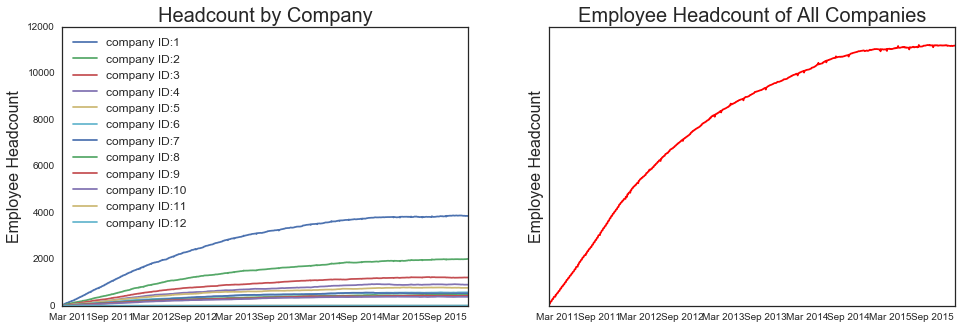

In [12]:
grouped = hc_info.groupby('company_id')
fig, axes = plt.subplots(1, 2, figsize=(16, 5), sharex=True, sharey=True)

for company, group in grouped:
    axes[0].plot(group['day'], group['employee_headcount'], label='company ID:{}'.format(company))
    axes[0].legend(loc='best', fontsize=12)

axes[0].set_ylabel('Employee Headcount', fontsize=16)
axes[0].set_title('Headcount by Company', fontsize=20)
# the plot shows employee headcount follow similar trends in all the companies

# plot the total headcount
total_hc = hc_info.groupby('day').sum()
axes[1].plot(total_hc.index.values, total_hc['employee_headcount'], color='r')
axes[1].set_ylabel('Employee Headcount', fontsize=16)
axes[1].set_title('Employee Headcount of All Companies', fontsize=20)

#### Plotting join and quit month distribution.

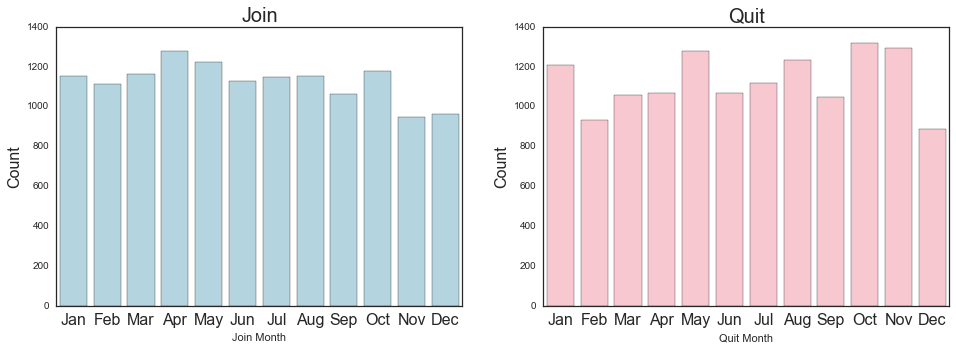

In [13]:
fig1, axes1 = plt.subplots(1, 2, figsize=(16, 5), sharex=True)

months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
sns.countplot('join_month', color='lightblue', data=decom_emp, ax=axes1[0])
axes1[0].set_xlabel('Join Month')
axes1[0].set_xticklabels(months, fontsize=16)
axes1[0].set_ylabel('Count', fontsize=16)
axes1[0].set_title('Join', fontsize=20)

sns.countplot('quit_month', color='pink',data=decom_emp, ax=axes1[1])
axes1[1].set_ylabel('Count', fontsize=16)
axes1[1].set_title('Quit', fontsize=20)
axes1[1].set_xticklabels(months, fontsize=16)
axes1[1].set_xlabel('Quit Month')

Top join months: Apr, May, Oct.

Top quit months: Oct, Nov, May.

Most employees change jobs in May and Oct with spread to Apr and Nov. This may be due to company hirings usually more active in spring and fall seasons. But the data looks close to uniform overall.

## Question 1: What are the main factors that drive employee churn?

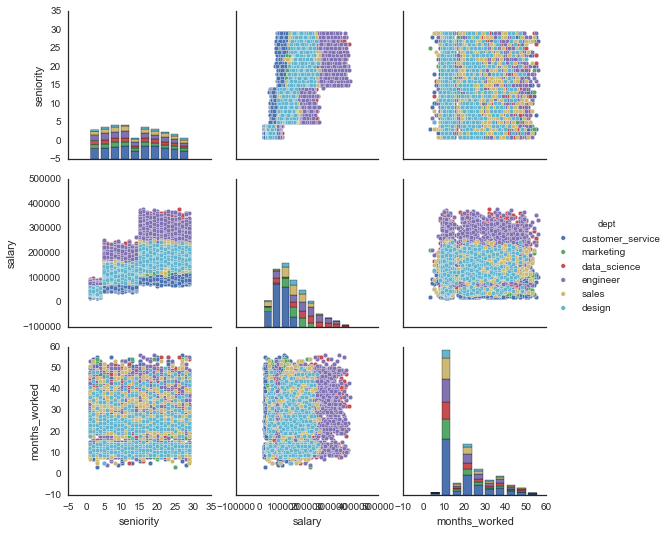

In [14]:
# First, explore the relationship of the features.
sns.pairplot(decom_emp, hue='dept', vars=['seniority', 'salary', 'months_worked'])

The salary and seniority relation displays a tier structure, which may be tied to the level of titles associated with seniority. We also see the salary range differs among departments. Engineers and data scientists have the highest salaries, followed by design and sales people.

No obvious correlation between salary and seniority with the tenure of employees when combining all the departments. However, the tenure distribution is heavily right skewed, indicating a large group of employees quit before 15 months since joining the company. 

Let's look at how this break down in each department.

### Explore relationship of months worked with salary and salary/seniority in each department.

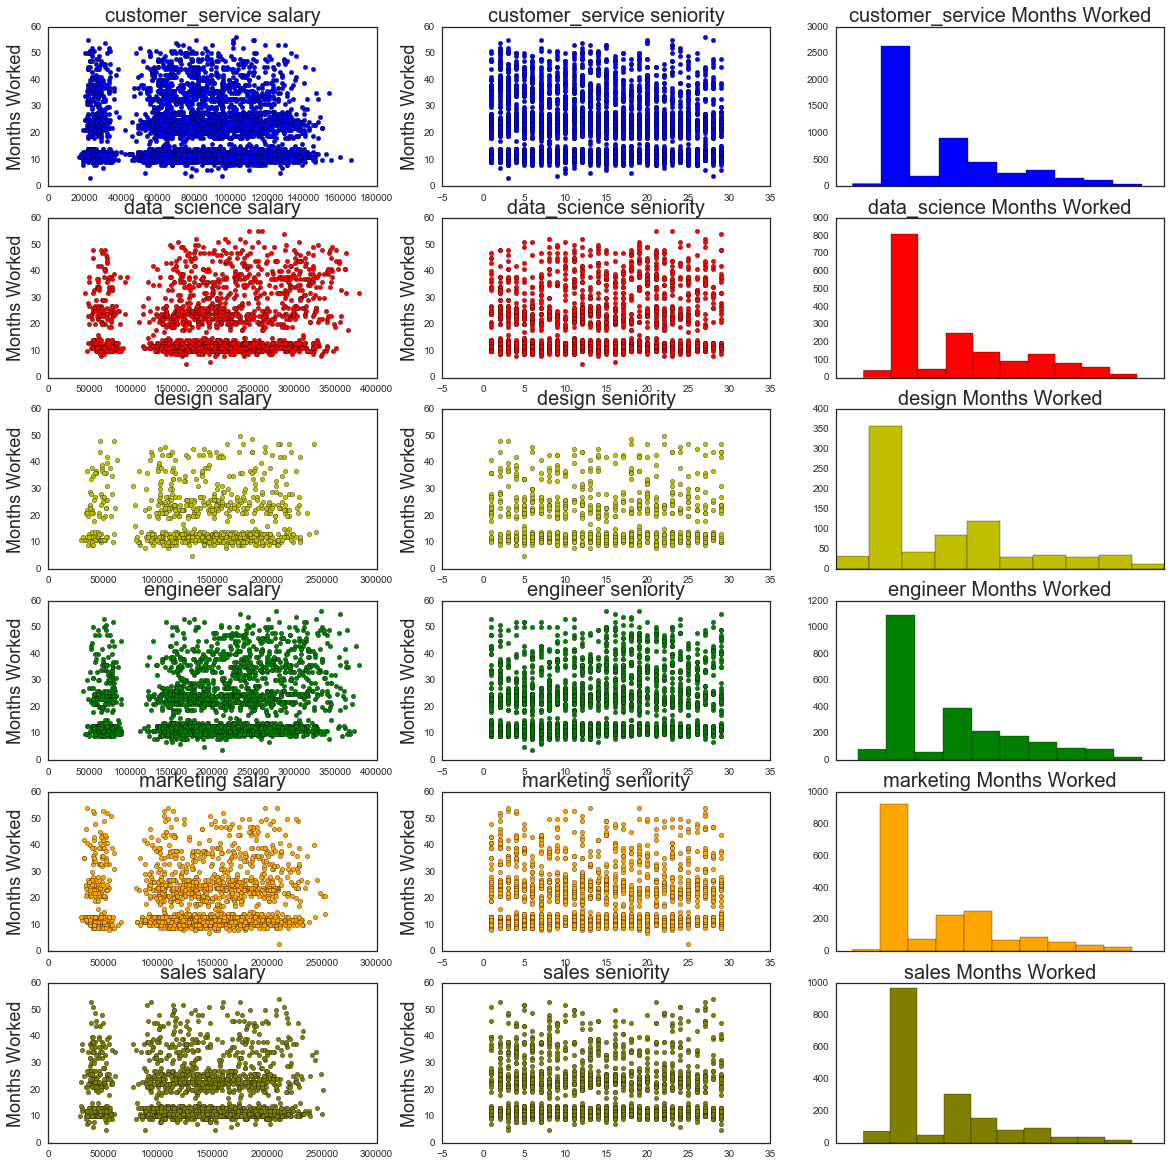

In [15]:
dept_info = decom_emp[['dept', 'salary', 'seniority', 'months_worked']]
grouped_dept = dept_info.groupby('dept')

fig0, axes0 = plt.subplots(6, 3, figsize=(20, 20))
colors = ['b', 'r', 'y', 'g', 'orange', 'olive']

for i, (dept, g) in enumerate(grouped_dept):
    for j in range(dept_info.shape[1] - 1):
        if j < dept_info.shape[1] - 2:
            axes0[i,j].scatter(g.iloc[:,j+1], g['months_worked'], label=dept, c=colors[i])
            axes0[i,j].set_ylabel('Months Worked', fontsize=18)
            axes0[i,j].set_title('{} {}'.format(dept, g.columns[j+1]), fontsize=20)
        else:
            axes0[i,j].hist(g['months_worked'], color=colors[i])
            axes0[i,j].xaxis.set_visible(False)
            axes0[i,j].set_title('{} Months Worked'.format(dept), fontsize=20)

The highly skewed months worked trend also shows in each department, with distinct separation around 15 months, then around 30 months. We probably don't have enough information to accurately predict months an employee will work before quitting, but we can try to batch the prediction into three groups: 0-15 months, 16-30 months, and >30 months.

It's also intuitive to associate salary to employee churn. Since the salary range is different in different departments, we need to convert the actually salaries to their respective departmental percentiles.

In [16]:
# chop down the salary range into 10% bins
cuts = np.linspace(0, 1, 22)
cuts

array([ 0.  ,  0.05,  0.1 ,  0.14,  0.19,  0.24,  0.29,  0.33,  0.38,
        0.43,  0.48,  0.52,  0.57,  0.62,  0.67,  0.71,  0.76,  0.81,
        0.86,  0.9 ,  0.95,  1.  ])

In [17]:
# create a salary percentile column
decom_emp['salary_percentile'] = decom_emp.groupby('dept')['salary'].apply(lambda df: pd.qcut(df, cuts, labels=cuts[1:]*100))
decom_emp['salary_percentile'] = decom_emp['salary_percentile'].astype('float64')
decom_emp

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,employee_id,company_id,dept,seniority,salary,join_date,quit_date,quit_month,join_month,months_worked,salary_percentile
0,13021,7,customer_service,28.000000,89000.0,2014-03-24,2015-10-30,10.0,3,19.0,57.142857
1,825355,7,marketing,20.000000,183000.0,2013-04-29,2014-04-04,4.0,4,11.0,80.952381
3,662910,7,customer_service,20.000000,115000.0,2012-05-14,2013-06-07,6.0,5,12.0,85.714286
4,256971,2,data_science,23.000000,276000.0,2011-10-17,2014-08-22,8.0,10,34.0,85.714286
5,509529,4,data_science,14.000000,165000.0,2012-01-30,2013-08-30,8.0,1,18.0,33.333333
8,172999,9,engineer,7.000000,160000.0,2012-12-10,2015-10-23,10.0,12,34.0,28.571429
10,892155,6,customer_service,13.000000,72000.0,2012-11-12,2015-02-27,2.0,11,27.0,38.095238
12,939058,1,marketing,1.000000,48000.0,2012-12-10,2013-11-15,11.0,12,11.0,9.523810
13,163427,10,marketing,23.000000,154000.0,2012-06-18,2015-09-25,9.0,6,39.0,61.904762
14,461248,2,sales,20.000000,201000.0,2013-09-16,2014-08-22,8.0,9,11.0,90.476190


In [18]:
# check the maximum months worked.
np.round(decom_emp['months_worked'].describe(), 2)

count    13510.00
mean        19.66
std         10.80
min          3.00
25%         11.00
50%         13.00
75%         25.00
max         56.00
Name: months_worked, dtype: float64

In [19]:
def tenureGrouping(data, bins, num):
    """separate employee tenure into specified number of groups."""
    labels = []
    for i in range(num):
        labels.append('{}-{} months'.format(bins[i], bins[i+1]))
        
    df = data.copy()
    df['month_group'] = pd.cut(df['months_worked'], bins, labels = labels, precision=0)

    return df

In [20]:
def plotGroup(df, axes):
    
    colors = ['r', 'b', 'y', 'g', 'orange', 'olive']
    sal_groups = []
    sen_groups = []
    groups = sorted(df['month_group'].unique())
    
    for i in range(len(groups)):
        
        sal_groups.append(df.groupby('salary_percentile')['month_group'].apply(lambda d: np.sum(d==groups[i])/len(d))*100)
        axes[0].plot(sal_groups[i], c=colors[i], label=groups[i])
        axes[0].set_ylabel('Percentage', fontsize=16)
        axes[0].set_xlabel('Salary Percentile', fontsize=16)
        axes[0].legend(loc='best', fontsize=16)
        axes[0].set_title('Salary Percentile', fontsize=18)
        axes[0].set_xticks(np.linspace(0, 100, 11))
        axes[0].tick_params(axis='both', which='major', labelsize=16)

        df['seniority'] = df['seniority'].astype('int')
        sen_groups.append(df.groupby('seniority')['month_group'].apply(lambda d: np.sum(d==groups[i])/len(d)*100))
        axes[1].plot(sen_groups[i], c=colors[i], label=groups[i])
        axes[1].set_ylabel('Percentage', fontsize=16)
        axes[1].set_xlabel('Seniority', fontsize=16)
        axes[1].legend(loc='best', fontsize=16)
        axes[1].set_title('Seniority', fontsize=18)
        axes[1].tick_params(axis='both', which='major', labelsize=16)

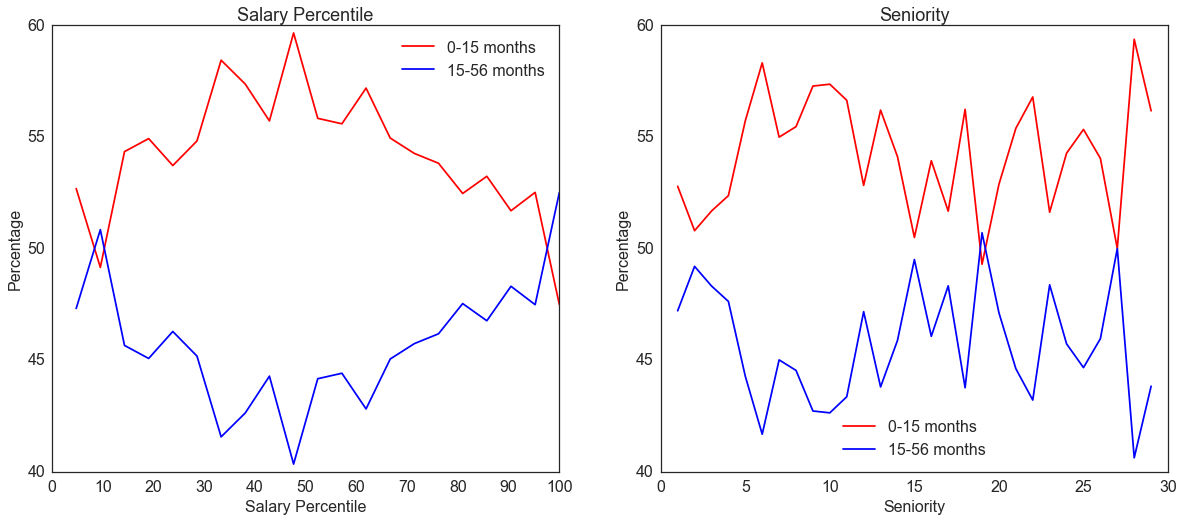

In [21]:
groups2 = tenureGrouping(decom_emp, [0, 15, 56], 2)

fig2, axes2 = plt.subplots(1, 2, figsize=(20, 8))
plotGroup(groups2, axes2)

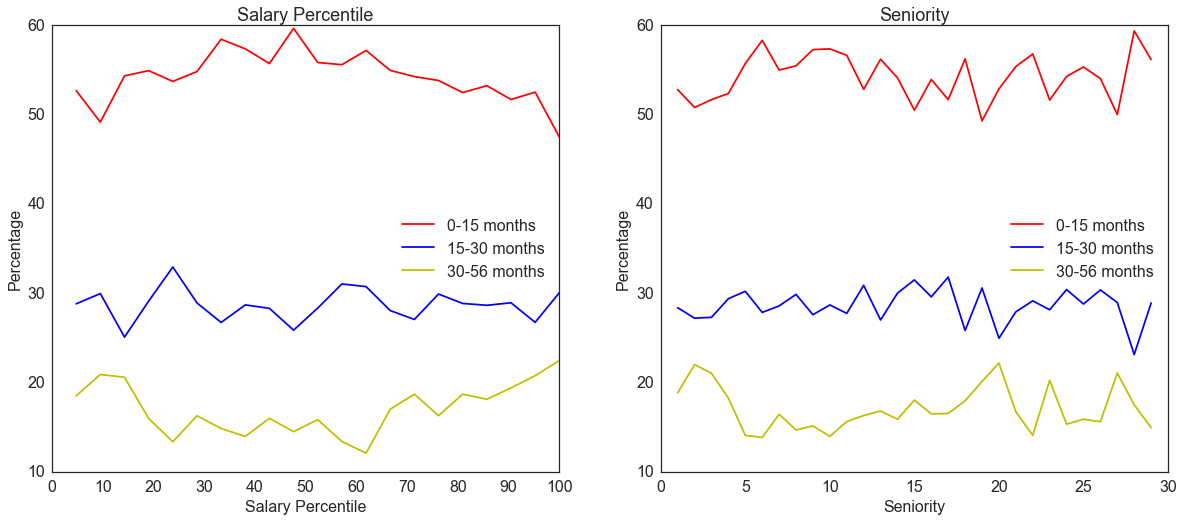

In [22]:
groups3 = tenureGrouping(decom_emp, [0, 15, 30, 56], 3)

fig3, axes3 = plt.subplots(1, 2, figsize=(20, 8))
plotGroup(groups3, axes3)

The salary plot suggests employees with the lowest and highest salary percentiles stay in the company longer than others. Percentage of employees working 16-30 months remain flat across the percentile. Employees at mid salary percentile of the department turn away sooner than other ranges.

On the other hand, the seniority plot has quite some fluctuations while the baseline remains flat.

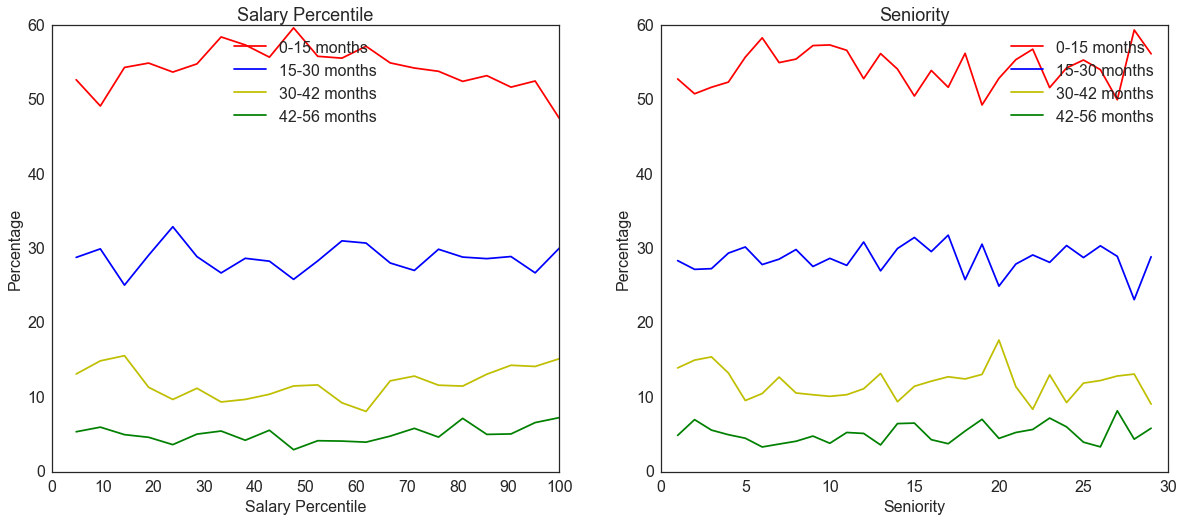

In [23]:
groups4 = tenureGrouping(decom_emp, [0, 15, 30, 42, 56], 4)

fig4, axes4 = plt.subplots(1, 2, figsize=(20, 8))
plotGroup(groups4, axes4)

Classifying months worked into 3 or 4 groups does not make significant difference in the plots.

Since grouping by 2 gives us the strongest association signals, we would like to dig a bit deeper into this grouping and see if there are other features that drive employee churn.

In [24]:
dept_dummies = pd.get_dummies(groups2['dept'])
month_dummies = pd.get_dummies(groups2['month_group'])
g2_dum = pd.concat([dept_dummies, groups2[['seniority', 'salary_percentile']], month_dummies], axis=1) 

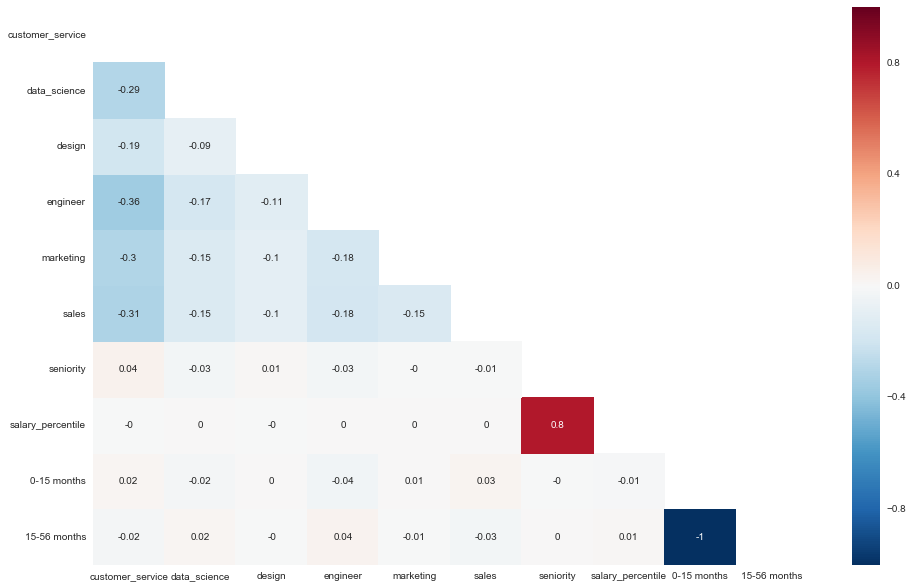

In [25]:
corr = g2_dum.corr()

plt.subplots(figsize=(16, 10))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, annot=np.round(corr, 2),)

The heatmap above shows us the 1-1 correlation of each paird features. Overall the correlations are weak.

In [26]:
g2_dum.corr()['0-15 months'].sort_values(ascending=False)

0-15 months          1.000000
sales                0.030478
customer_service     0.017685
marketing            0.006623
design               0.001695
seniority           -0.000082
salary_percentile   -0.013975
data_science        -0.022091
engineer            -0.037644
15-56 months        -1.000000
Name: 0-15 months, dtype: float64

In [27]:
g2_dum.corr()['15-56 months'].sort_values(ascending=False)

15-56 months         1.000000
engineer             0.037644
data_science         0.022091
salary_percentile    0.013975
seniority            0.000082
design              -0.001695
marketing           -0.006623
customer_service    -0.017685
sales               -0.030478
0-15 months         -1.000000
Name: 15-56 months, dtype: float64

Despite the weak correlations, the correlaion ranking seems to suggest employees in Sales, Customer Service, Marketing and Design departments tend to have shorter tenure than their counterparts in Data Science and Engineering groups. This finding is not surprising given that data scientists and engineers make more than others in the companies as shown in previous plot.

Can we model the data to predict employees' tenure groups?

## Model Fitting

In [28]:
from sklearn import svm
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder

In [29]:
def groupfit(df):
    
    dummies = pd.get_dummies(df['dept'])
    X = pd.concat([dummies, df[['seniority', 'salary_percentile']]], axis=1)
    y = LabelEncoder().fit_transform(df['month_group'])

    svc = svm.SVC()
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=0, stratify=y)
    
    Cs = [0.1, 1, 10, 100]
    gamma = [0.1, 1, 10, 100]
    grid = GridSearchCV(svc, param_grid={'C':Cs, 'gamma':gamma})
    grid.fit(X_train, y_train)
    
    print('Training Score: ', grid.score(X_train, y_train))
    print('Test Score: ', grid.score(X_val, y_val))
    
    return grid

In [30]:
clf2 = groupfit(groups2)

Training Score:  0.54822671528
Test Score:  0.542722583539


In [31]:
clf3 = groupfit(groups3)

Training Score:  0.542812948845
Test Score:  0.542946849069


In [32]:
clf4 = groupfit(groups4)

Training Score:  0.542812948845
Test Score:  0.542946849069


The scores are pretty close (~54%) among all three kinds of grouping. The descent size of data and consistently low training and test scores indicate the given information is not enough to make accurate predictions.

## Question 2: What additional variable could help explain employee churn?

Other than salary and seniority, the variables below may be helpful in explaining employee churn:
    1. Employee promotion during tenure.
    2. Salary raise by year.
    3. Non-salary offers given such as stock options.
    4. The market average of salaries in each department as a reference line.